# Tomasz Biegus Coffee data analysis

In analysis I decided to use great library DALEX which is designed exactly for tasks like this one.
Here's the site of project: https://github.com/pbiecek/DALEX
DALEX calculate how much we loose in accuracy if certain variable is permuted, which means this variable havent hold any valuable information anymore.

In [4]:
options(warn=-1)

In [5]:
library(tidyverse)
library(randomForest)
library(DALEX)

Read the data and deal with na's.

In [6]:
coffee_data = read.csv("coffee_data.csv")
set.seed(222)
coffee_imputed  <- rfImpute(mark ~ ., coffee_data);
set.seed(333)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    1.076    68.26 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    1.062    67.38 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |     1.08    68.49 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    1.079    68.42 |
     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
 300 |    1.066    67.64 |


Build random forest model.

In [7]:
coffee_rf <- randomForest(mark~., data=coffee_imputed, ntree=100)

Explain importance of variables using DALEX.

variable,dropout_loss,label
_full_model_,201.8064,randomForest
mark,201.8064,randomForest
processing_method,244.9469,randomForest
preinfusion,249.8113,randomForest
TDS,329.4269,randomForest
region,332.5095,randomForest
water_ph,374.5782,randomForest
plantation_height,389.5276,randomForest
brewing_temp,515.4418,randomForest
grinding_level,608.8571,randomForest


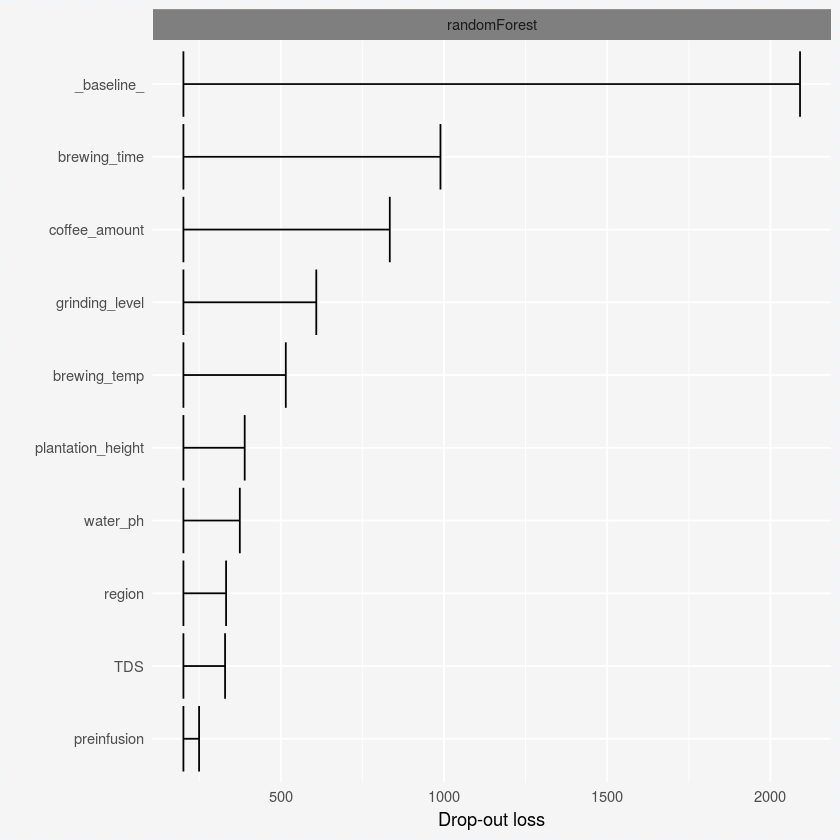

In [8]:
explainter_rf <- explain(coffee_rf, data = coffee_imputed, y = coffee_imputed$mark)
variable_importance_rf <- variable_importance(explainter_rf, type = "raw")
variable_importance_rf
plot(variable_importance_rf)

As we can see, the most important variable is brewing_time followed by coffee_amount and grinding_level.